In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
data_path = '../../data/metadata/'

Number of works in each fandom

In [8]:
fandom_size = {}

In [5]:
for f in os.listdir(data_path):
    df = pd.read_csv(os.path.join(data_path, f), sep = '\t')
#     print(len(df))
    try:
        df = df.drop(['ChapterIndex', 'URL','CompleteDate','UpdateDate'], axis=1)
    except:
        df = df.drop(['ChapterIndex', 'CompleteDate','UpdateDate'], axis=1)
    df = df.drop_duplicates()
#     print(len(df))
    fandom_size[len(df)] = f.split('.')[0]

In [67]:
sum(fandom_size.keys())

3726307

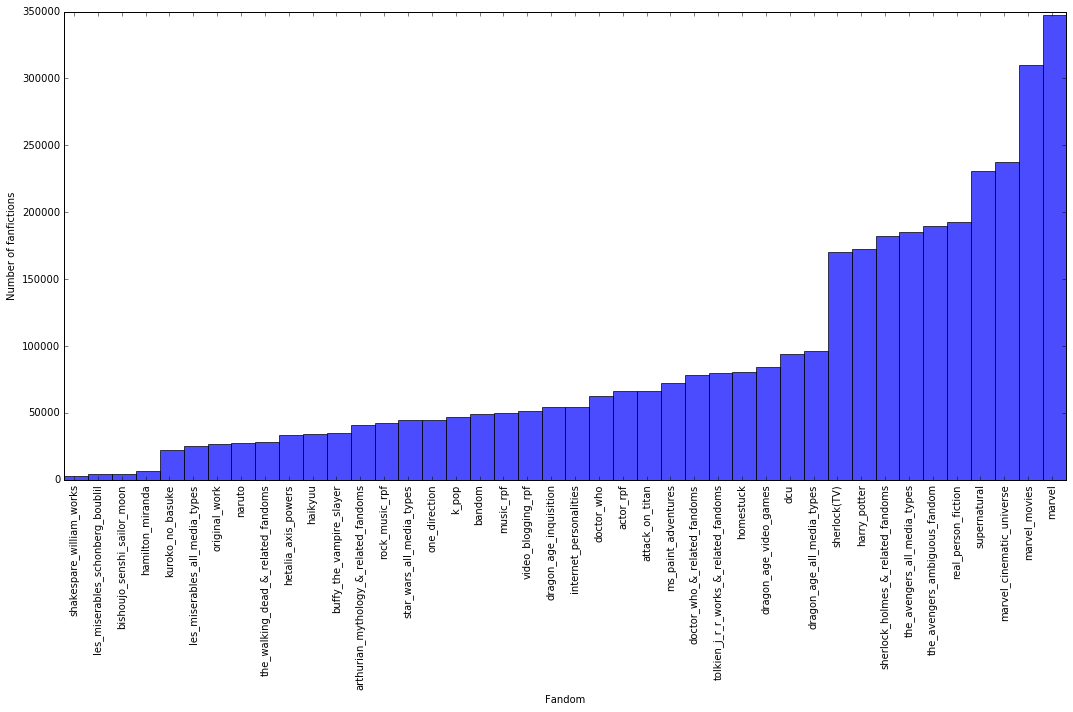

In [66]:
plt.figure()
plt.figure(figsize = (15,10))
idx = np.arange(len(fandom_size))
data = sorted(fandom_size.keys())
labels = [fandom_size[i].replace('_metadata', '') for i in sorted(fandom_size.keys())]
plt.bar(idx, data, 1, alpha = 0.7)
plt.xticks(idx + 0.4,labels,rotation = '90')
plt.xlim(0, 42)
plt.xlabel("Fandom")
plt.ylabel("Number of fanfictions")
plt.tight_layout()
plt.savefig("fandom_size.png", type="png")

Length distribution

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ValueError: labels ['URL'] not contained in axis

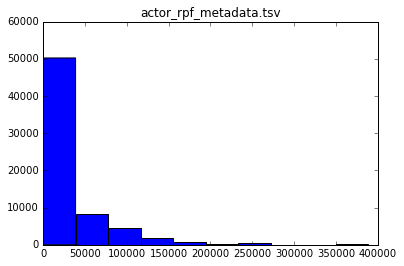

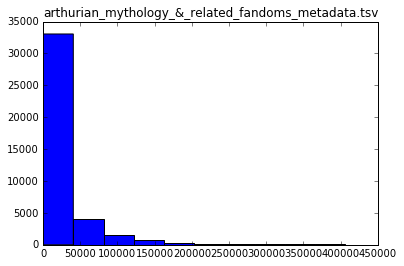

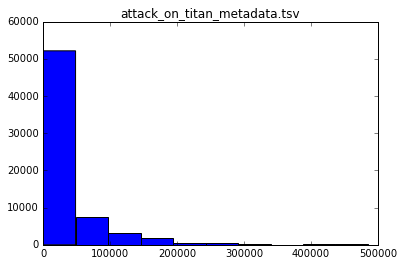

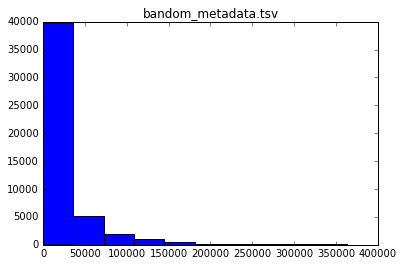

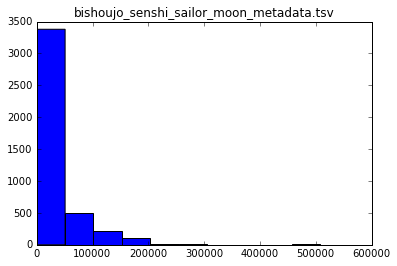

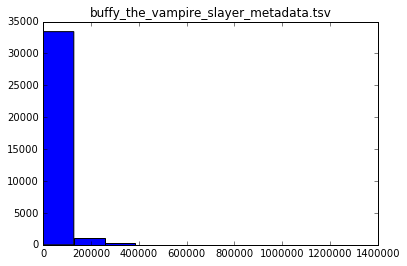

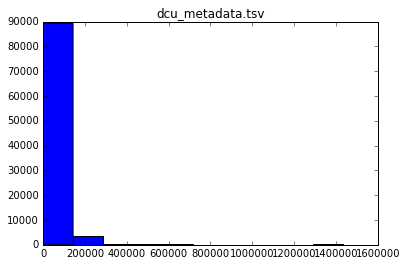

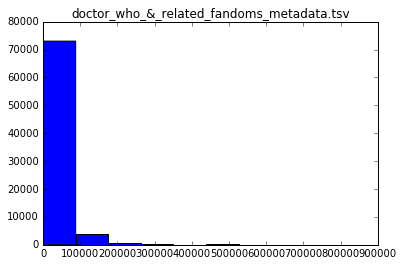

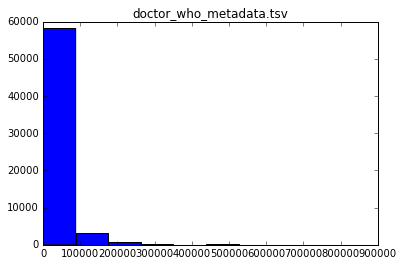

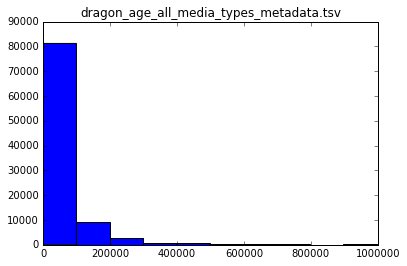

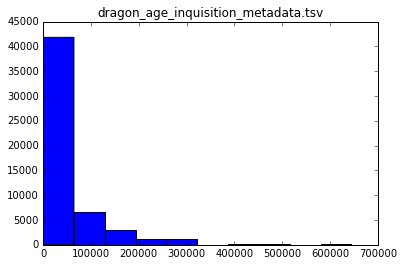

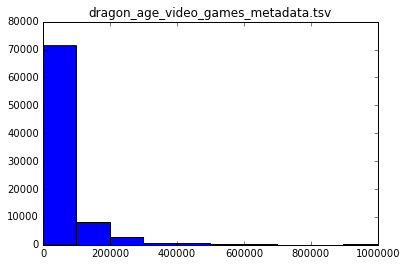

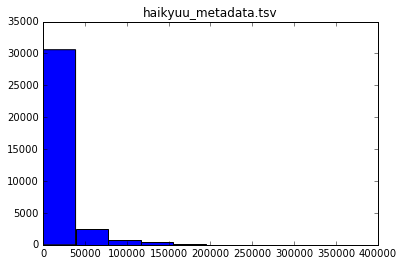

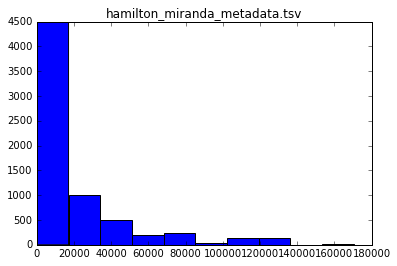

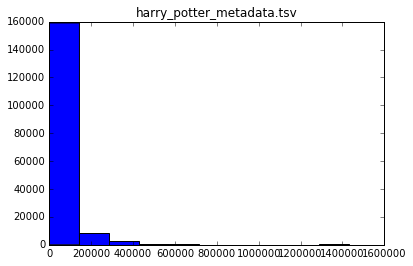

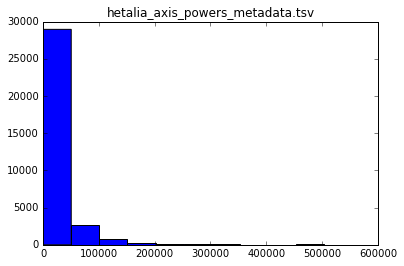

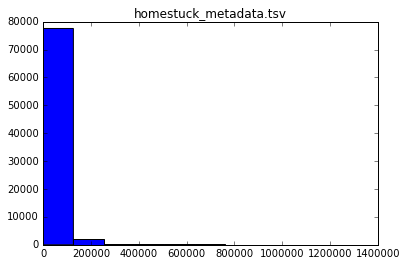

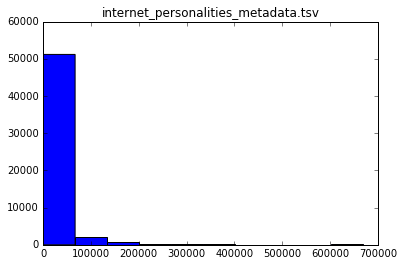

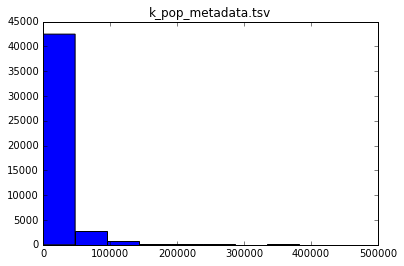

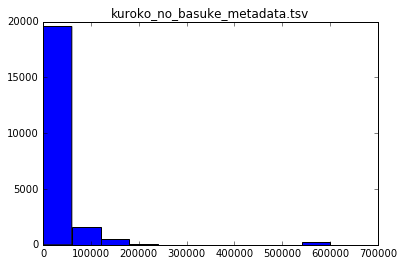

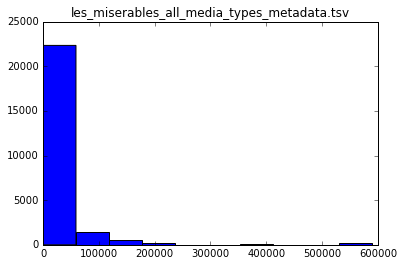

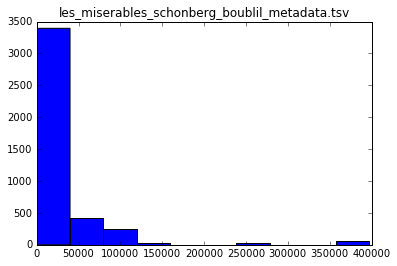

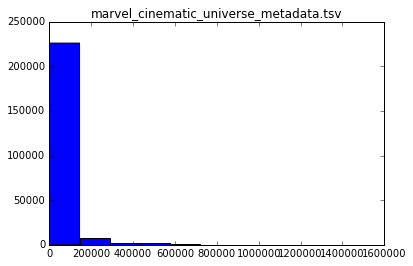

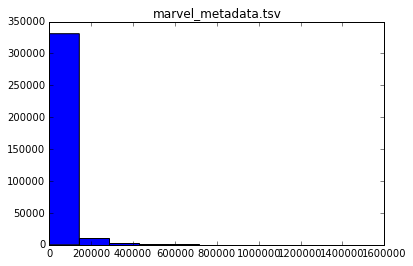

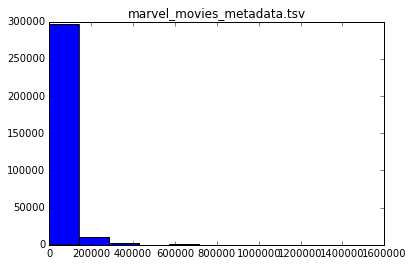

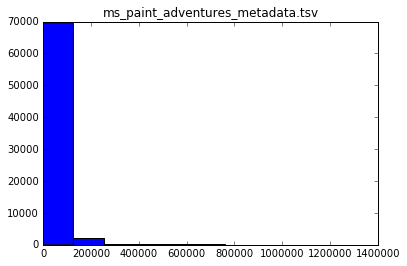

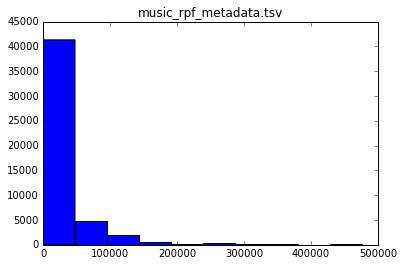

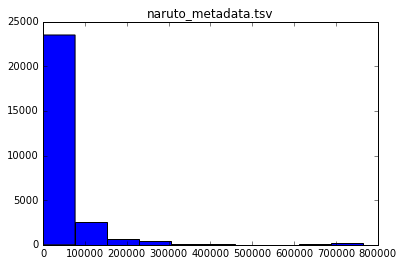

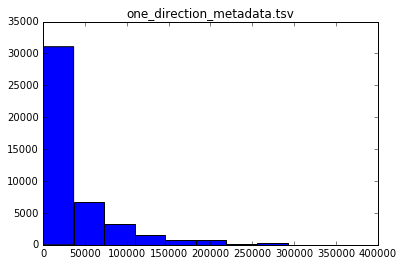

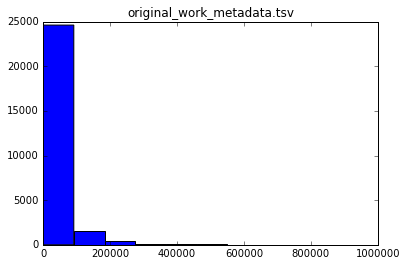

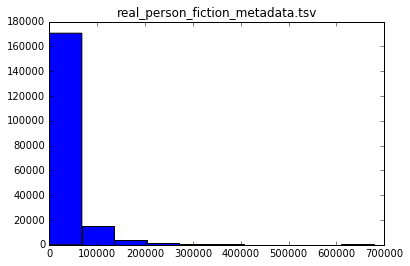

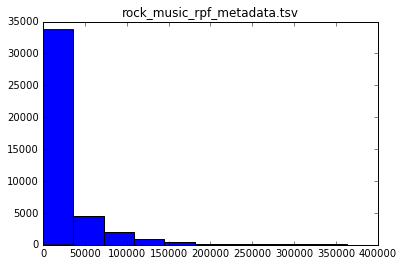

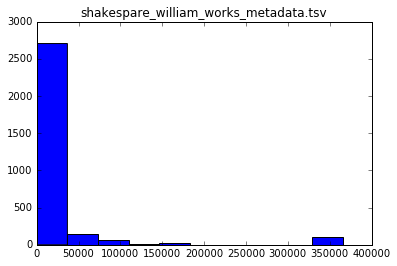

In [5]:
for f in os.listdir(data_path):
    plt.figure()
    df = pd.read_csv(os.path.join(data_path, f), sep = '\t')
    df = df.drop(['ChapterIndex', 'URL','CompleteDate','UpdateDate'], axis=1)
    df = df.drop_duplicates()
    words = [i for i in df.Words.tolist() if not np.isnan(i)]
    plt.hist(sorted(words))
    plt.title(f)


In [6]:
def create_timelist(df):
    timelist = df.PublishDate.drop_duplicates().tolist()
    timelist = [str(i)[:7] for i in timelist]
    return sorted(list(set(timelist)))

In [7]:
def create_df_time(df, time):
    return df[df.PublishDate.str[:7] == time]

In [12]:
for f in os.listdir(data_path):
    word_month = {}
    df = pd.read_csv(os.path.join(data_path, f), sep = '\t')
    df = df.drop(['ChapterIndex', 'URL','CompleteDate','UpdateDate'], axis=1)
    df = df.drop_duplicates()
    tl = create_timelist(df)
    for t in tl:
        df_t = create_df_time(df,t)
        word_month[t] = df_t.Words.sum()
    for k,v in word_month.items():
        print(k,v)
    break


2012-10 7559394.0
2008-10 519408.0
2015-03 52624328.0
2006-08 880393.0
2015-04 47260400.0
2005-10 124663.0
2001-05 4215.0
2013-11 28321832.0
2005-04 192602.0
2014-09 46979394.0
2005-07 249759.0
2013-10 31261782.0
2003-04 82507.0
2008-12 272764.0
2012-07 10101668.0
2014-08 52860235.0
2005-02 665346.0
2006-06 1886996.0
2007-04 769464.0
2006-05 2050163.0
2009-09 1033822.0
2003-05 103351.0
2014-03 47083394.0
2007-01 1009359.0
2015-08 56615792.0
2006-03 480219.0
2006-10 545662.0
2004-11 255613.0
2007-02 632845.0
2015-10 46695230.0
2006-12 791935.0
2012-01 5705151.0
2014-06 46020220.0
2007-09 132699.0
2011-11 5483481.0
2010-12 1639801.0
2002-02 23745.0
2012-05 11324659.0
2002-04 28428.0
2012-12 11196467.0
2007-07 1106124.0
2006-07 1595924.0
2003-11 214760.0
2003-02 64730.0
2012-08 16612838.0
2009-06 765203.0
2004-02 3291671.0
2003-08 552851.0
2011-05 2967104.0
2006-04 1817561.0
2015-02 46830915.0
2016-05 12816510.0
2002-08 92077.0
2007-11 344787.0
2014-07 53270122.0
2007-06 601676.0
2013-02 

Kudos/Hits

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


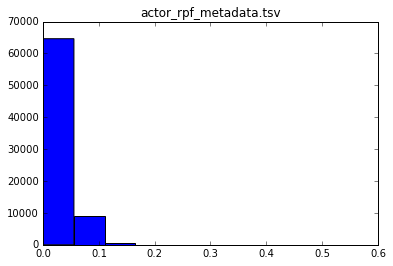

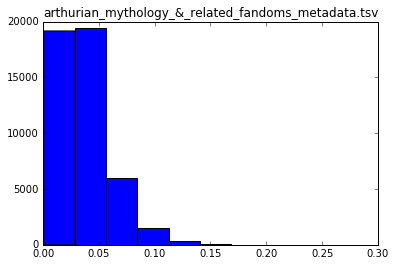

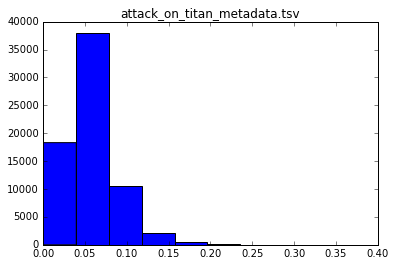

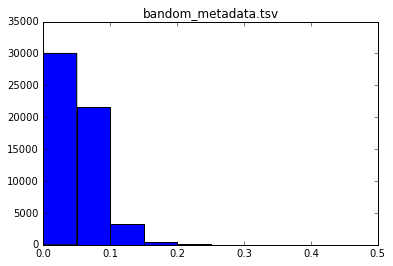

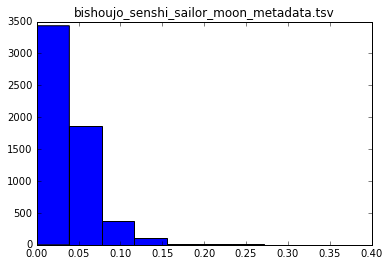

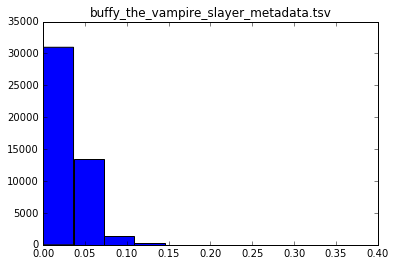

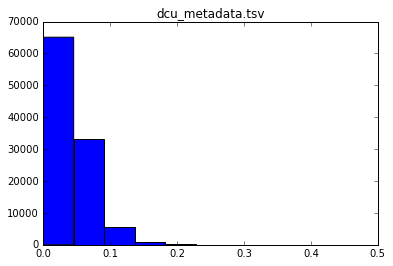

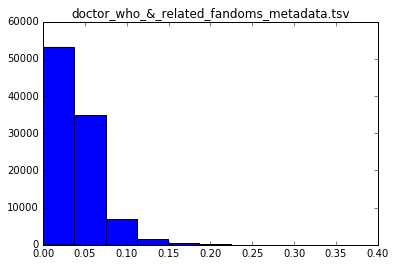

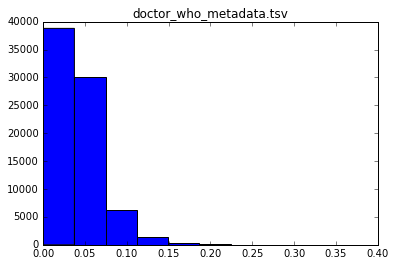

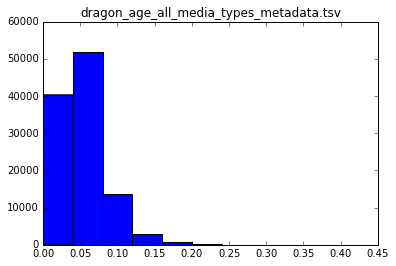

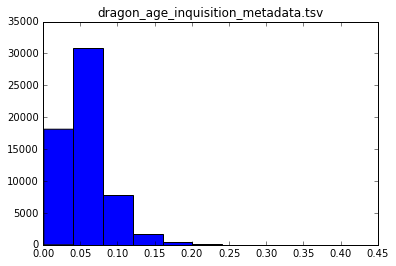

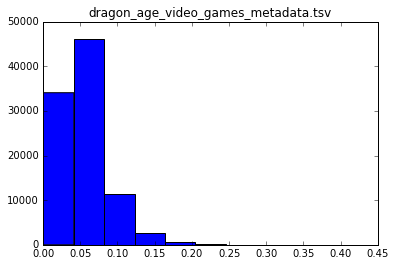

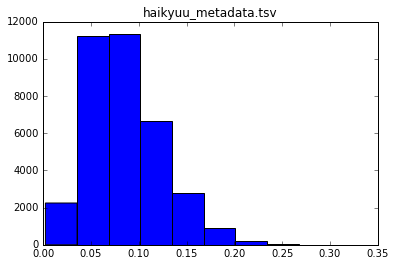

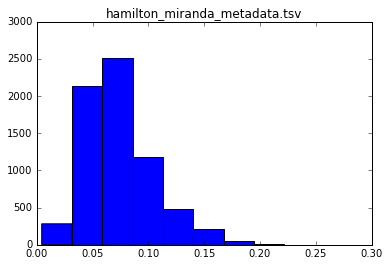

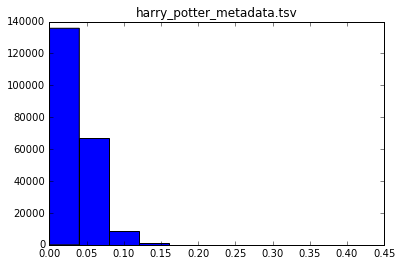

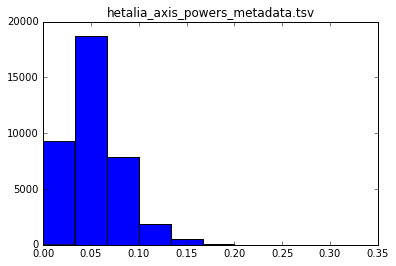

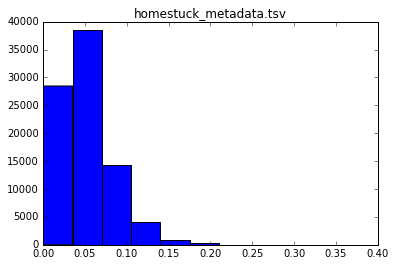

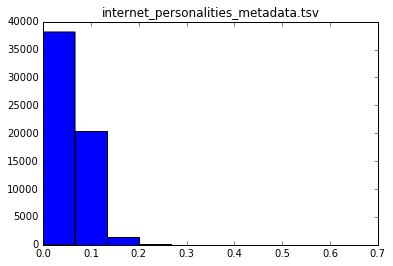

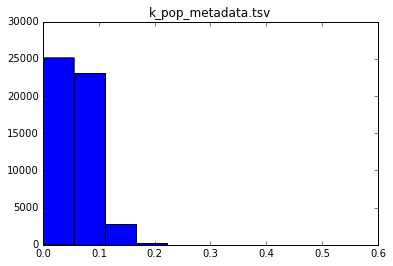

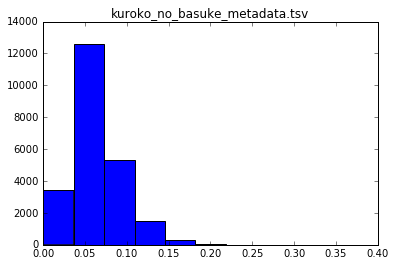

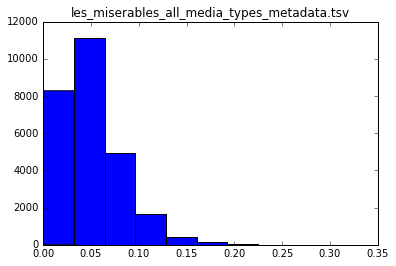

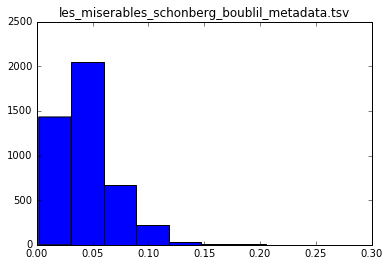

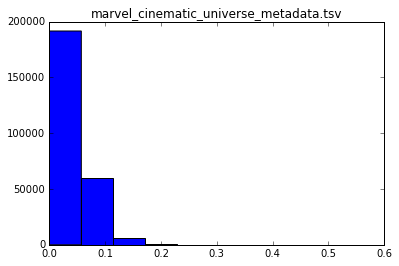

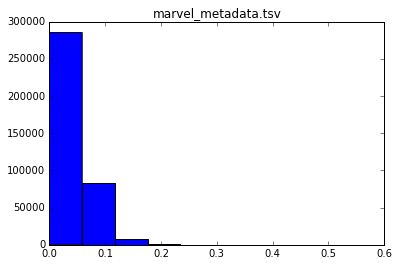

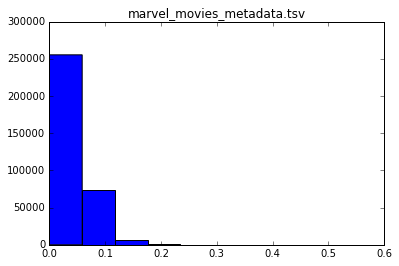

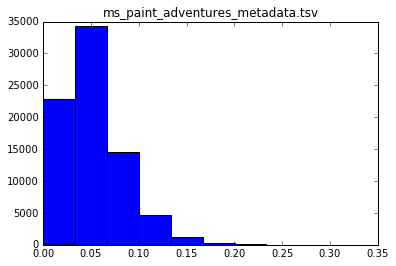

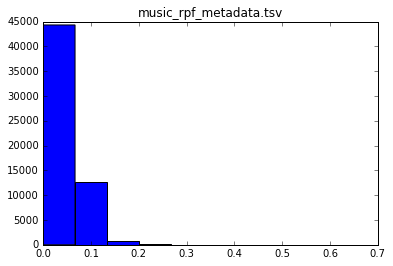

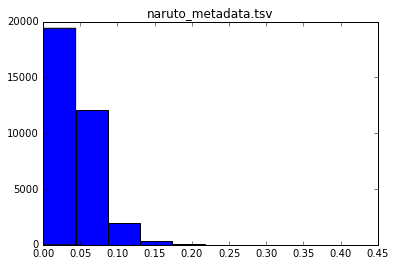

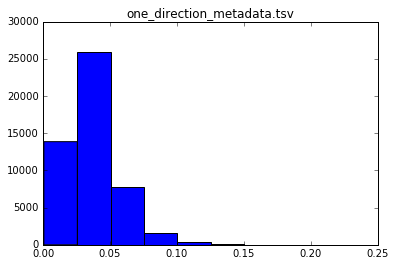

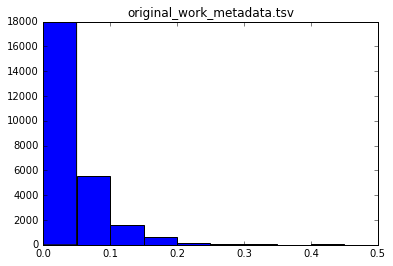

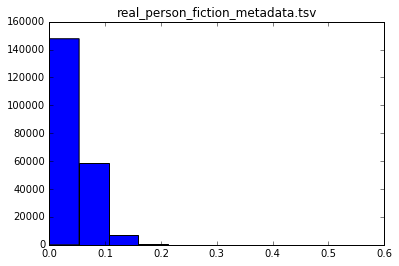

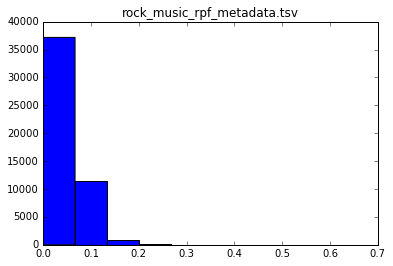

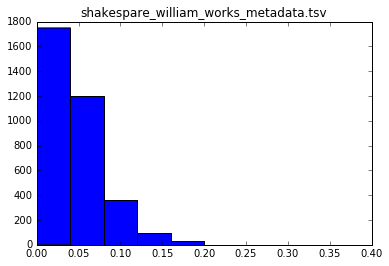

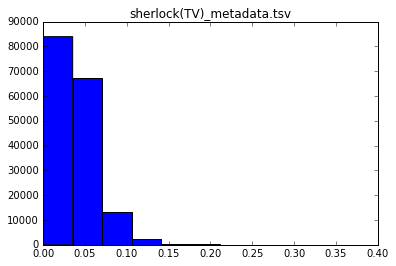

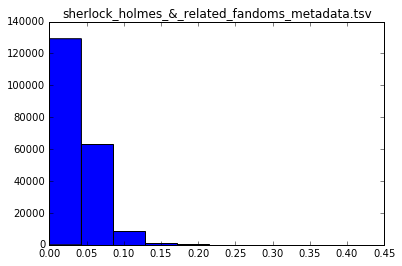

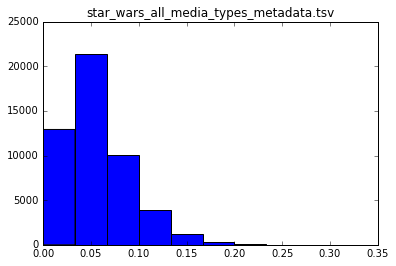

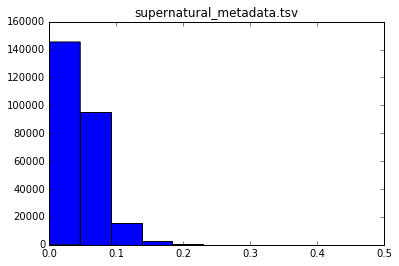

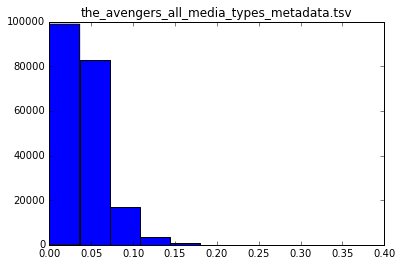

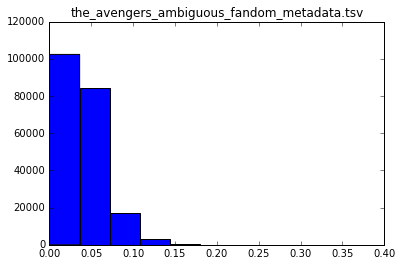

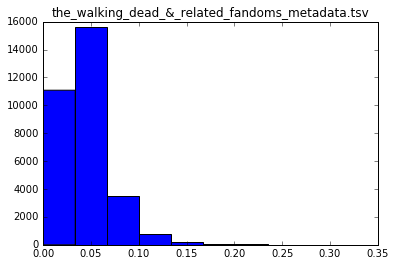

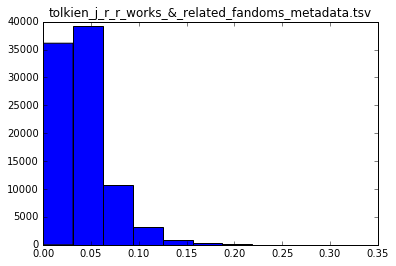

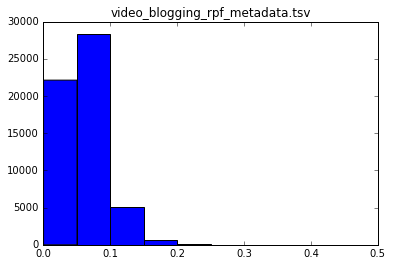

In [14]:
for f in os.listdir(data_path):
    plt.figure()
    df = pd.read_csv(os.path.join(data_path, f), sep = '\t')
    df = df.drop(['ChapterIndex', 'CompleteDate','UpdateDate'], axis=1)
    df = df.drop_duplicates()
    df['Kudos/Hits'] = df['Kudos'].astype(float)/df['Hits'].astype(float)
    plt.hist([i for i in df['Kudos/Hits'].tolist() if not np.isnan(i) and not np.isinf(i)])
    plt.title(f)
